In [46]:
%run _init_.py

pandas: pd 2.2.2
numpy : np 2.1.0
matplotlib : mpl 3.9.2
seaborn : sns 0.13.2
sklearn : skl 1.5.1


C:\Users\m\4차4차\speed\데이터 전처리\_init_.py:27: SyntaxWarning: invalid escape sequence '\W'
  font_path = "c:\Windows\Fonts\malgun.ttf"


In [47]:
dfs01 =  pd.read_csv('train.csv')

In [48]:
import pandas as pd

# 데이터프레임 로드 (여기서는 데이터프레임이 df로 가정)
dfs01 =  pd.read_csv('train.csv')


# 범주형 데이터와 수치형 데이터의 개수 계산
categorical_count = dfs01.select_dtypes(include=['object']).shape[1]
numerical_count = dfs01.select_dtypes(include=['int64', 'float64']).shape[1]

print(f"범주형 데이터 열 개수: {categorical_count}")
print(f"수치형 데이터 열 개수: {numerical_count}")


범주형 데이터 열 개수: 43
수치형 데이터 열 개수: 38


In [49]:
dfs01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [50]:
# 범주형 데이터 열들만 선택
categorical_columns = dfs01.select_dtypes(include=['object', 'category']).columns

# 각 범주형 열의 결측치를 'Unknown'으로 대체
for column in categorical_columns:
    dfs01[column].fillna('Unknown', inplace=True)

# 각 범주형 열의 고유값 확인
for column in categorical_columns:
    unique_values = dfs01[column].unique()
    print(f"Column '{column}' unique values:")
    print(unique_values)
    print()


Column 'MSZoning' unique values:
['RL' 'RM' 'C (all)' 'FV' 'RH']

Column 'Street' unique values:
['Pave' 'Grvl']

Column 'Alley' unique values:
['Unknown' 'Grvl' 'Pave']

Column 'LotShape' unique values:
['Reg' 'IR1' 'IR2' 'IR3']

Column 'LandContour' unique values:
['Lvl' 'Bnk' 'Low' 'HLS']

Column 'Utilities' unique values:
['AllPub' 'NoSeWa']

Column 'LotConfig' unique values:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Column 'LandSlope' unique values:
['Gtl' 'Mod' 'Sev']

Column 'Neighborhood' unique values:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Column 'Condition1' unique values:
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Column 'Condition2' unique values:
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

Column 'BldgType' unique values:
[

C:\Users\m\AppData\Local\Temp\ipykernel_11196\2878741391.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfs01[column].fillna('Unknown', inplace=True)


In [51]:
# 범주형 데이터 열들만 선택
categorical_columns = dfs01.select_dtypes(include=['object', 'category']).columns
# categorical_columns의 갯수를 변수에 저장
x = len(categorical_columns)
print(x)

43


In [52]:
# 범주형 데이터들 확인 후 라벨링 작업

# 범주형 데이터 열들만 선택
categorical_columns = dfs01.select_dtypes(include=['object', 'category']).columns

# 라벨 인코더 객체 생성
label_encoders = {}

# 범주형 열들에 대해 라벨 인코딩 수행
for column in categorical_columns:
    # 라벨 인코더 객체 생성
    le = LabelEncoder()
    
    # 결측치를 'Unknown'으로 대체
    dfs01[column].fillna('Unknown', inplace=True)
    
    # 고유값을 라벨 인코딩
    dfs01[column] = le.fit_transform(dfs01[column])
    
    # 라벨 인코더 저장
    label_encoders[column] = le

# df2를 CSV 파일로 저장
# dfs01.to_csv('dfs01.csv', index=False)

# 결과 확인
print(dfs01.head())


   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      2         3   
1   2          20         3         80.0     9600       1      2         3   
2   3          60         3         68.0    11250       1      2         0   
3   4          70         3         60.0     9550       1      2         0   
4   5          60         3         84.0    14260       1      2         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            3          0  ...         0       3      4            4        0   
1            3          0  ...         0       3      4            4        0   
2            3          0  ...         0       3      4            4        0   
3            3          0  ...         0       3      4            4        0   
4            3          0  ...         0       3      4            4        0   

   MoSold  YrSold  SaleType  SaleCondition  

C:\Users\m\AppData\Local\Temp\ipykernel_11196\1214219604.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfs01[column].fillna('Unknown', inplace=True)
C:\Users\m\AppData\Local\Temp\ipykernel_11196\1214219604.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [53]:
# 결측치가 있는 열만 출력
missing_data = dfs01.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


LotFrontage    259 - 열 삭제하고 
MasVnrArea       8 - 결측값 있는 행만 삭제 하고
GarageYrBlt     81 - 중간값으로 대입하는 코드

# Alley 열의 고유 값 확인 후 변환

In [23]:

# 결측치가 있는 열 찾기
missing_value_columns = dfs01.columns[dfs01.isnull().any()]

# 각 결측치가 있는 열의 고유 값 확인
for column in missing_value_columns:
    unique_values = dfs01[column].unique()
    print(f"Column '{column}' unique values:")
    print(unique_values)
    print()


Column 'LotFrontage' unique values:
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

Column 'MasVnrArea' unique values:
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+0

C:\Users\m\AppData\Local\Temp\ipykernel_11196\2731336837.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_subset['GarageYrBlt'].fillna(df_subset['GarageYrBlt'].mean(), inplace=True)  # 'GarageYrBlt' 열의 결측값을 0으로 대체
C:\Users\m\AppData\Local\Temp\ipykernel_11196\2731336837.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

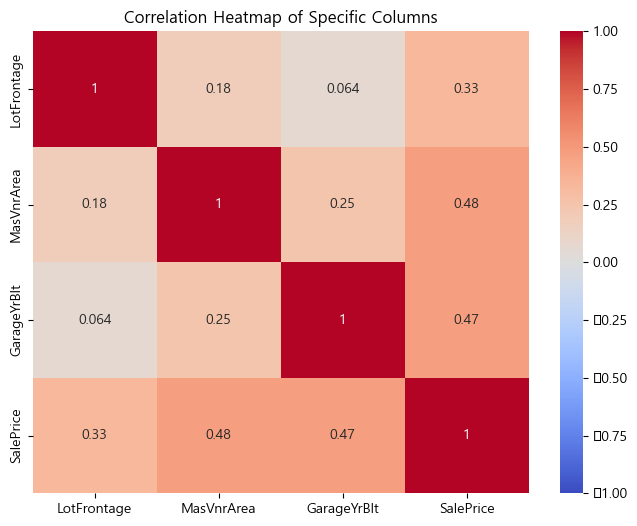

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_specific_correlation_heatmap(dfs01):
    """
    이 함수는 'LotFrontage', 'MasVnrArea', 'GarageYrBlt' 열과 'SalePrice' 열 간의 상관관계를 분석하고,
    해당 열들만을 포함하는 상관관계 히트맵을 생성합니다.
    
    Parameters:
    df2 (pd.DataFrame): 분석할 데이터프레임
    
    Returns:
    None
    """
    
    # 관심 있는 열들만 선택
    cols_to_analyze = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']
    df_subset = dfs01[cols_to_analyze].copy()

    # 결측값 처리
    df_subset['GarageYrBlt'].fillna(df_subset['GarageYrBlt'].mean(), inplace=True)  # 'GarageYrBlt' 열의 결측값을 0으로 대체
    df_subset['LotFrontage'].fillna(df_subset['LotFrontage'].mean(), inplace=True)  # 'LotFrontage' 열의 결측값을 평균으로 대체
    df_subset['MasVnrArea'].fillna(df_subset['MasVnrArea'].mean(), inplace=True)  # 'MasVnrArea' 열의 결측값을 평균으로 대체

    # 상관관계 계산
    corr = df_subset.corr()

    # 히트맵 생성
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Heatmap of Specific Columns')
    plt.show()

# 함수 호출 예시
plot_specific_correlation_heatmap(dfs01)


C:\Users\m\AppData\Local\Temp\ipykernel_11196\2902053227.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_subset['GarageYrBlt'].fillna(0, inplace=True)  # 'GarageYrBlt' 열의 결측값을 0으로 대체
C:\Users\m\AppData\Local\Temp\ipykernel_11196\2902053227.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

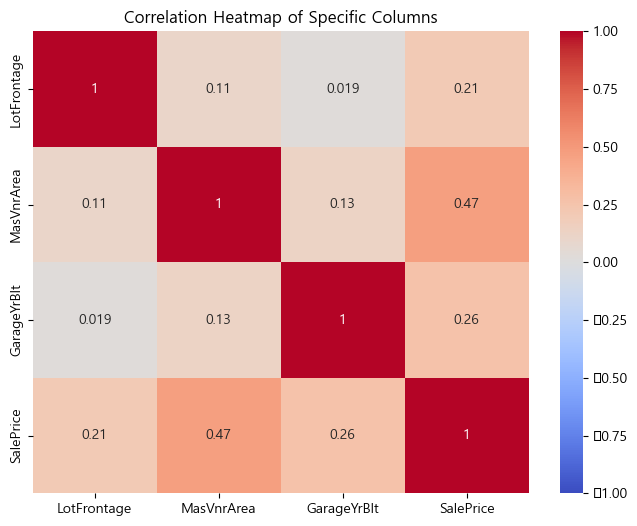

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_specific_correlation_heatmap(dfs01):
    """
    이 함수는 'LotFrontage', 'MasVnrArea', 'GarageYrBlt' 열과 'SalePrice' 열 간의 상관관계를 분석하고,
    해당 열들만을 포함하는 상관관계 히트맵을 생성합니다.
    
    Parameters:
    df2 (pd.DataFrame): 분석할 데이터프레임
    
    Returns:
    None
    """
    
    # 관심 있는 열들만 선택
    cols_to_analyze = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']
    df_subset = dfs01[cols_to_analyze].copy()

    # 결측값 처리
    df_subset['GarageYrBlt'].fillna(0, inplace=True)  # 'GarageYrBlt' 열의 결측값을 0으로 대체
    df_subset['LotFrontage'].fillna(0, inplace=True)  # 'LotFrontage' 열의 결측값을 평균으로 대체
    df_subset['MasVnrArea'].fillna(0, inplace=True)  # 'MasVnrArea' 열의 결측값을 평균으로 대체

    # 상관관계 계산
    corr = df_subset.corr()

    # 히트맵 생성
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Heatmap of Specific Columns')
    plt.show()

# 함수 호출 예시
plot_specific_correlation_heatmap(dfs01)


In [26]:
# 1. 'LotFrontage' 열 삭제
dfs02 = dfs01.drop(columns=['LotFrontage'])

In [27]:
# 2. 'MasVnrArea' 열에서 결측값이 있는 행 삭제
dfs03 = dfs02.dropna(subset=['MasVnrArea'])

In [28]:
# 3. 'GarageYrBlt' 열의 결측값을 중간값으로 대체
median_garage_yr_blt = dfs03['GarageYrBlt'].median()
dfs03['GarageYrBlt'].fillna(median_garage_yr_blt, inplace=True)

C:\Users\m\AppData\Local\Temp\ipykernel_11196\3104839869.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfs03['GarageYrBlt'].fillna(median_garage_yr_blt, inplace=True)
C:\Users\m\AppData\Local\Temp\ipykernel_11196\3104839869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs03['GarageYrBlt'].fillna(median_garage_yr_blt, inplace=True)

In [29]:
# 전처리 끝난 파일을 CSV 파일로 저장
dfs03.to_csv('dfs03.csv', index=False)

### 상관계수 분석

In [36]:

# 상관관계 계산
corr = dfs03.corr()
    
# 'SalePrice'와의 상관관계만 필터링
corr_saleprice = corr[['SalePrice']]
    
# 'SalePrice'를 제외한 열만 필터링
corr_saleprice_excluding = corr_saleprice.drop('SalePrice')
    
# 절대값이 threshold 이상인 상관계수 필터링
significant_corr = corr_saleprice_excluding[abs(corr_saleprice_excluding['SalePrice']) >= 0.5]
    
# 'SalePrice'와의 상관계수가 임계값 이상인 열들로 새로운 데이터프레임 생성
over05 = significant_corr.copy()
    
# 결과 출력
print("상관계수 절대값이 {} 이상인 열들:\n".format(0.5))
print(over05)


상관계수 절대값이 0.5 이상인 열들:

              SalePrice
OverallQual    0.789997
YearBuilt      0.522896
YearRemodAdd   0.507158
ExterQual     -0.633635
BsmtQual      -0.618894
TotalBsmtSF    0.612971
1stFlrSF       0.606849
GrLivArea      0.710080
FullBath       0.562491
KitchenQual   -0.586597
TotRmsAbvGrd   0.536311
GarageFinish  -0.548947
GarageCars     0.639686
GarageArea     0.622492


In [41]:
import pandas as pd

# 필요한 열 리스트
selected_columns = [
'OverallQual','YearBuilt',
'YearRemodAdd','ExterQual',     
'BsmtQual','TotalBsmtSF','1stFlrSF','GrLivArea',  
'FullBath','KitchenQual','TotRmsAbvGrd','GarageFinish',  
'GarageCars','GarageArea','SalePrice'
]

# 데이터프레임에서 선택된 열만 추출
over05 = dfs03[selected_columns]

# 새로운 데이터프레임을 CSV 파일로 저장
over05.to_csv('over05.csv', index=False)

print("CSV 파일로 저장 완료!")


CSV 파일로 저장 완료!


In [38]:
over05.head()

,SalePrice
OverallQual,0.789997
YearBuilt,0.522896
YearRemodAdd,0.507158
ExterQual,-0.633635
BsmtQual,-0.618894


In [ ]:
import pandas as pd

def get_significant_columns(dfs03, threshold=0.5):
    """
    상관계수의 절대값이 주어진 임계값(threshold) 이상인 열들을 반환합니다.
    
    Parameters:
    dfs03 (pd.DataFrame): 상관관계를 계산할 데이터프레임
    threshold (float): 상관계수의 절대값 임계값
    
    Returns:
    List[str]: 상관계수가 임계값 이상인 열들의 리스트
    """
    # 상관관계 계산
    corr = dfs03.corr()
    
    # 'SalePrice'와의 상관관계만 필터링
    corr_saleprice = corr[['SalePrice']]
    
    # 'SalePrice'를 제외한 열만 필터링
    corr_saleprice_excluding = corr_saleprice.drop('SalePrice')
    
    # 절대값이 threshold 이상인 상관계수 필터링
    significant_corr = corr_saleprice_excluding[abs(corr_saleprice_excluding['SalePrice']) >= threshold]
    
    # 상관계수가 임계값 이상인 열들의 리스트 반환
    significant_columns = significant_corr.index.tolist()
    return significant_columns

def save_significant_columns_to_csv(dfs03, threshold=0.5, filename='over05.csv'):
    """
    상관계수의 절대값이 임계값 이상인 열들만 추출하여 CSV 파일로 저장합니다.
    
    Parameters:
    dfs03 (pd.DataFrame): 데이터프레임
    threshold (float): 상관계수의 절대값 임계값
    filename (str): 저장할 CSV 파일명
    
    Returns:
    None
    """
    # 상관계수가 임계값 이상인 열들의 리스트 가져오기
    significant_columns = get_significant_columns(dfs03, threshold)
    
    # 'SalePrice' 열을 포함한 열 리스트 생성
    selected_columns = significant_columns + ['SalePrice']
    
    # 데이터프레임에서 선택된 열만 추출
    over05 = dfs03[selected_columns]
    
    # 새로운 데이터프레임을 CSV 파일로 저장
    over05.to_csv(filename, index=False)
    
    print(f"CSV 파일로 저장 완료! 파일명: {filename}")

# 예제 사용법
# df = pd.read_csv('your_data.csv')  # 데이터프레임 로드
# save_significant_columns_to_csv(df, threshold=0.5, filename='over05.csv')
